## Building a logistic regression model
#### 1. Visualizing the data
#### 2. Fitting the model using logistic regression(training and testing on the same data instead of using train/test split)
#### 3. Model coefficients and performance metrics

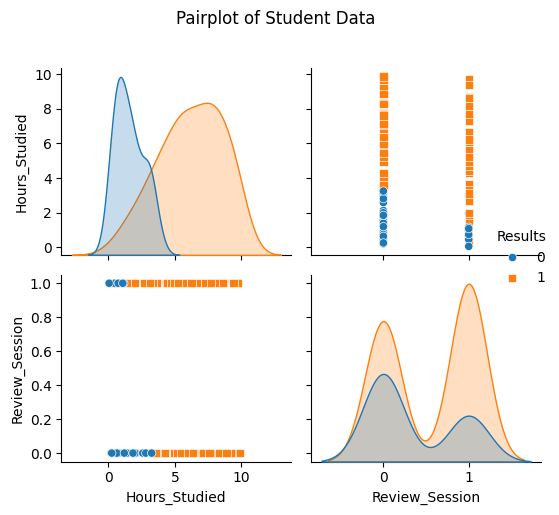

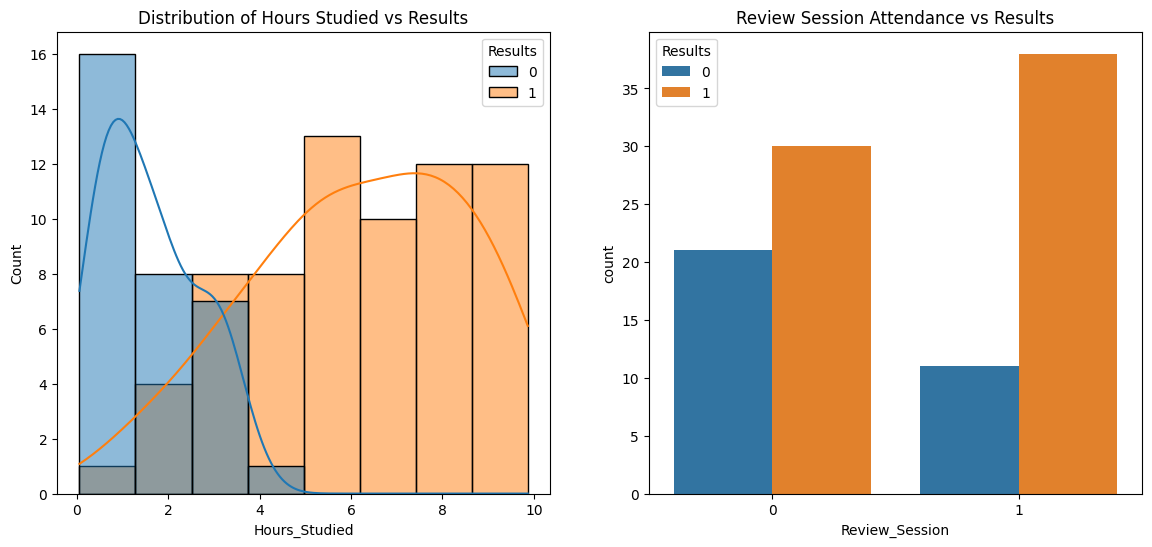

Intercept: 2.015223835705396
Coefficients: [3.00072026 1.00361597]

Confusion Matrix:
[[29  3]
 [ 5 63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.95      0.93      0.94        68

    accuracy                           0.92       100
   macro avg       0.90      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100

AUC: 0.98


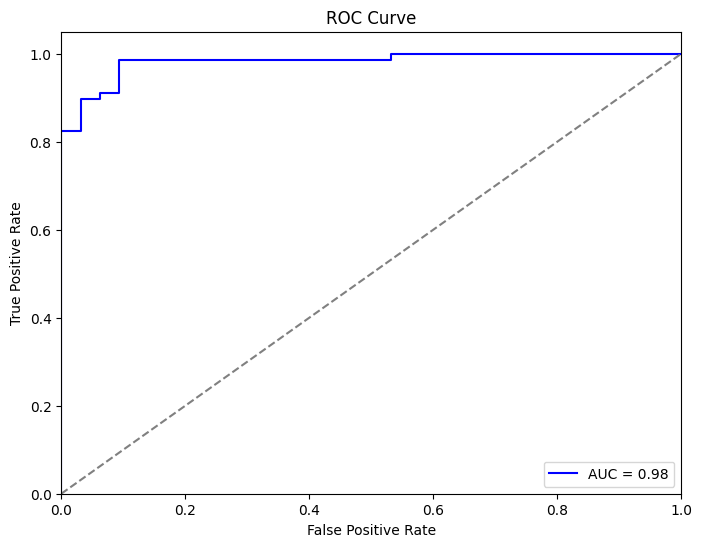

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load the dataset
df = pd.read_csv('/Users/praveesha/Desktop/IS733/lab/week6/student_data.csv')

# (1) Visualize the Data
# Create a pair plot to visualize the relationships between Hours_Studied, Review_Session, and Results
sns.pairplot(df, hue='Results', markers=["o", "s"])
plt.suptitle('Pairplot of Student Data', y=1.02)  # Adjust the title position with y parameter
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

# Visualize the distribution of Hours_Studied and Review_Session for pass/fail results
plt.figure(figsize=(14, 6))

# Distribution of Hours_Studied
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Hours_Studied', hue='Results', kde=True)
plt.title('Distribution of Hours Studied vs Results')

# Distribution of Review_Session attendance
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Review_Session', hue='Results')
plt.title('Review Session Attendance vs Results')
plt.show()

# (2) Fit the Logistic Regression Model using the full dataset (no train-test split)

# Define the features (X) and target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardize the feature variables for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
log_reg = LogisticRegression()

# Fit the model using the full dataset
log_reg.fit(X_scaled, y)

# (3) Output Model Coefficients and Performance Metrics

# Model coefficients (Intercept and Coefficients for each feature)
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficients}')

# Predict probabilities
y_pred_prob = log_reg.predict_proba(X_scaled)[:, 1]

# Predict the labels (0 or 1)
y_pred = log_reg.predict(X_scaled)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Building SVM Model using
#### 1. Linear Kernel
#### 2. RBF Kernel (using  grid search to find the best gamma parameter using k-fold cross-validation)

In [4]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Define the features (X) and target (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (1) Support Vector Machine with Linear Kernel
linear_svc = SVC(kernel='linear', probability=True)

# Fit the linear SVM model
linear_svc.fit(X_scaled, y)

# Predict using the linear kernel model
y_pred_linear = linear_svc.predict(X_scaled)

# Output performance metrics for linear kernel
print("Support Vector Machine with Linear Kernel:")
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_linear))
print("\nClassification Report:")
print(classification_report(y, y_pred_linear))

# (2) Support Vector Machine with RBF Kernel and Grid Search for Best Gamma

# Define the model with RBF kernel
rbf_svc = SVC(kernel='rbf', probability=True)

# Define the parameter grid for gamma
param_grid = {'gamma': [0.01, 0.1, 1, 10, 100], 'C': [0.1, 1, 10, 100]}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rbf_svc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model using grid search
grid_search.fit(X_scaled, y)

# Output the best parameters found by grid search
print(f"\nBest parameters for RBF kernel: {grid_search.best_params_}")

# Predict using the best RBF kernel model
best_rbf_svc = grid_search.best_estimator_
y_pred_rbf = best_rbf_svc.predict(X_scaled)

# Output performance metrics for RBF kernel
print("\nSupport Vector Machine with RBF Kernel (Best Gamma):")
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_rbf))
print("\nClassification Report:")
print(classification_report(y, y_pred_rbf))


Support Vector Machine with Linear Kernel:

Confusion Matrix:
[[30  2]
 [ 7 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.97      0.90      0.93        68

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters for RBF kernel: {'C': 100, 'gamma': 10}

Support Vector Machine with RBF Kernel (Best Gamma):

Confusion Matrix:
[[29  3]
 [ 1 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.96      0.99      0.97        68

    accuracy                           0.96       100
   macro avg       0.96      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



In [5]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


## Visualising data points and decision boundaries for the trained model
#### 1. Linear Kernel
#### 2. RBF Kernel (using best Gamma)

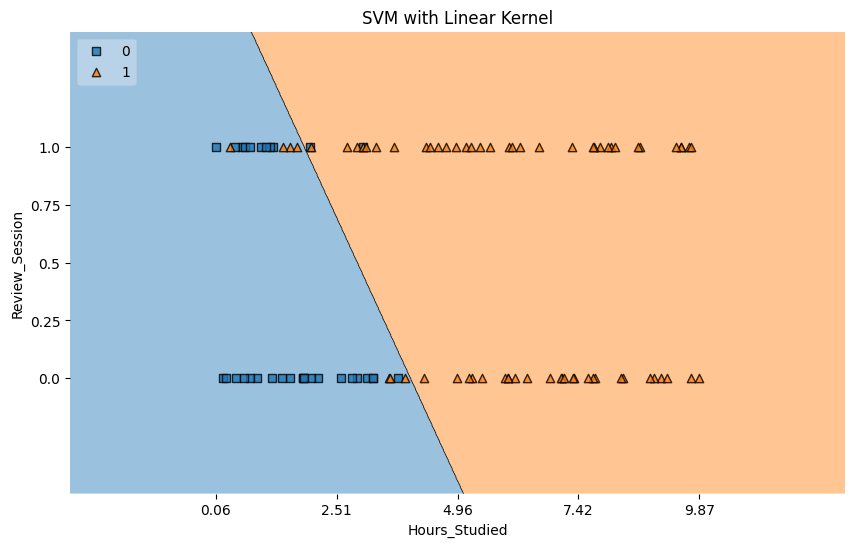

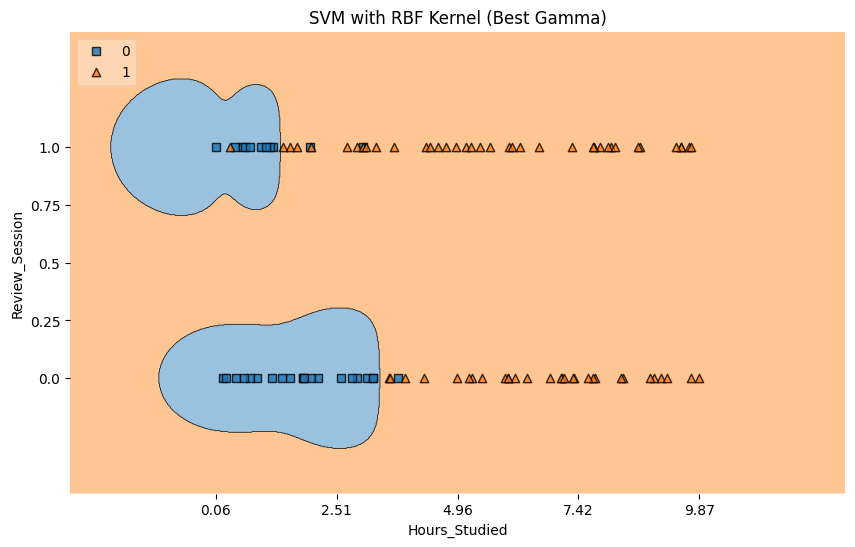

In [7]:
# Import necessary libraries for visualization
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Define function to plot decision boundary and data points using unscaled data for plotting
def plot_decision_boundary(X_original, X_scaled, y, model, title):
    plt.figure(figsize=(10, 6))
    # Plot the decision regions using mlxtend's plot_decision_regions function
    plot_decision_regions(X_scaled, y, clf=model, legend=2)
    
    # Formatting the plot to display original feature values
    plt.title(title)
    plt.xlabel('Hours_Studied')
    plt.ylabel('Review_Session')
    
    # Adjust the ticks to show the original data values (before scaling)
    plt.xticks(ticks=np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 5),
               labels=np.linspace(X_original[:, 0].min(), X_original[:, 0].max(), 5).round(2))
    plt.yticks(ticks=np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 5),
               labels=np.linspace(X_original[:, 1].min(), X_original[:, 1].max(), 5).round(2))
    
    plt.show()

# Scale the dataset as before
X = df[['Hours_Studied', 'Review_Session']].to_numpy()  # Use original data for plotting
y = df['Results'].to_numpy()

# Standardize the features for model training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (1) Linear Kernel SVM
linear_svc = SVC(kernel='linear')
linear_svc.fit(X_scaled, y)

# Visualize the decision boundary for Linear Kernel
plot_decision_boundary(X, X_scaled, y, linear_svc, "SVM with Linear Kernel")

# (2) RBF Kernel SVM (Best Gamma from Grid Search)
best_rbf_svc = grid_search.best_estimator_

# Visualize the decision boundary for RBF Kernel
plot_decision_boundary(X, X_scaled, y, best_rbf_svc, "SVM with RBF Kernel (Best Gamma)")


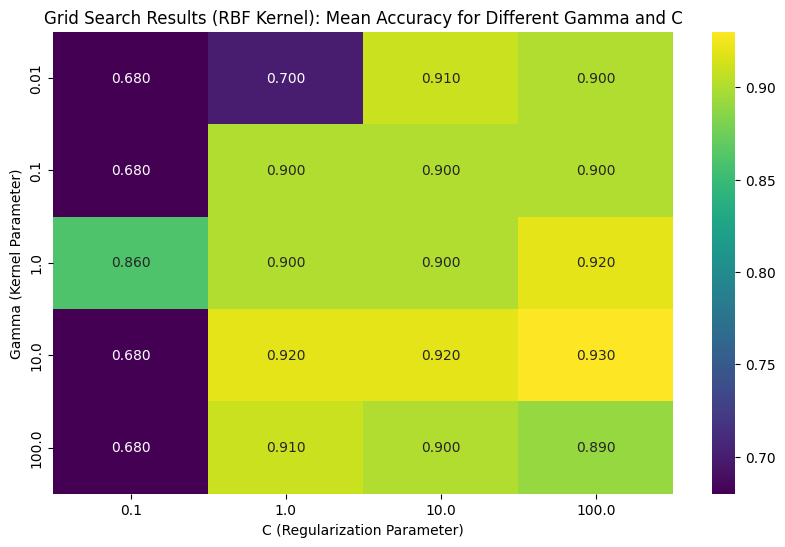

In [13]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# (1) Visualize the Grid Search results
# Retrieve the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Extract the parameters (C and gamma) and the corresponding mean test score
pivot_table = results.pivot_table(index='param_gamma', columns='param_C', values='mean_test_score')

# Create a heatmap to visualize performance across different gamma and C values
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.3f')
plt.title('Grid Search Results (RBF Kernel): Mean Accuracy for Different Gamma and C')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Gamma (Kernel Parameter)')
plt.show()
